<Axes: >

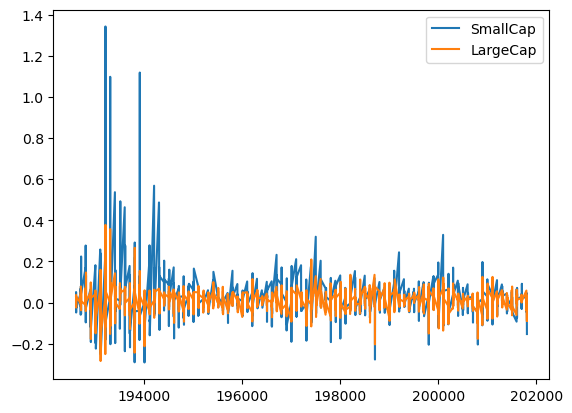

In [8]:
import pandas as pd
data = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",header=0,index_col=0,parse_dates=True,na_values=-99.99)
rets = data[["Lo 10","Hi 10"]]
rets.columns = ["SmallCap","LargeCap"]
rets = rets/100
rets.plot.line()

In [9]:
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [10]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

1st column is dtype='int64' but not time series

In [13]:
rets.index = pd.to_datetime(rets.index,format="%Y%m")
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

now dtype='datetime64[ns]'

In [22]:
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [26]:
rets.index = rets.index.to_period("M")
rets.head()

AttributeError: 'PeriodIndex' object has no attribute 'to_period'

In [27]:
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [25]:
rets.loc["1975"]

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


**Compute Drawdown**

<Axes: >

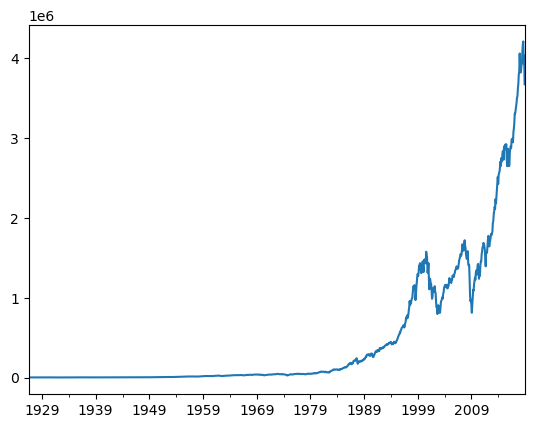

In [32]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()
wealth_index.plot()

In [33]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

In [34]:
previous_peak = wealth_index.cummax()

In [35]:
previous_peak.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1078.293786
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<Axes: >

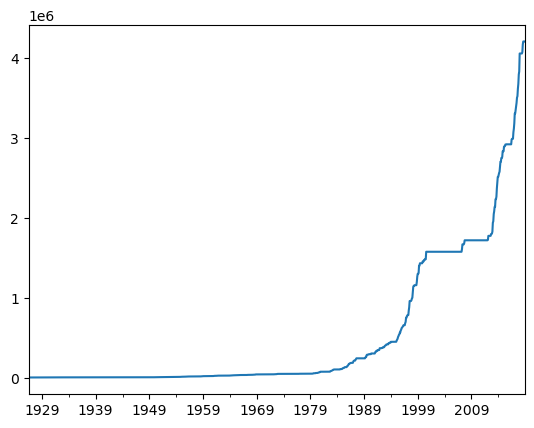

In [36]:
previous_peak.plot()

<Axes: >

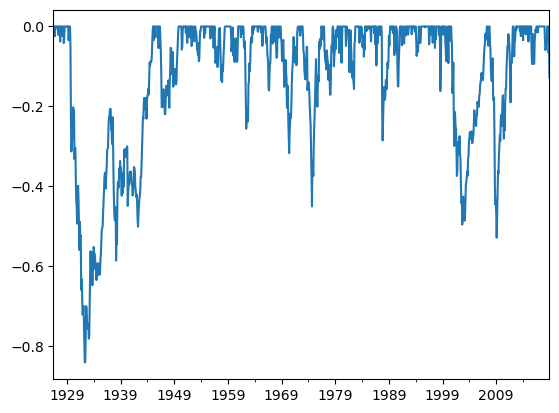

In [37]:
drawdown = (wealth_index-previous_peak)/previous_peak
drawdown.plot()

In [38]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [40]:
drawdown.min()  # max drawdown is 84%

-0.8400375277943123

In [43]:
drawdown.idxmin() # max drawdown was 84% in 1932

Period('1932-05', 'M')

In [44]:
drawdown["1975":].min() # max drawdown since 1975

-0.5280945042309304

In [53]:
def drawdownfunc(return_series: pd.Series):
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peak = wealth_index.cummax()
    drawdown = (wealth_index-previous_peak)/previous_peak
    return pd.DataFrame(
    {
        "Wealth":wealth_index,
        "Peaks": previous_peak,
        "Drawdown":drawdown
    })

In [54]:
dd = drawdownfunc(rets["LargeCap"])

In [55]:
dd.head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


<Axes: >

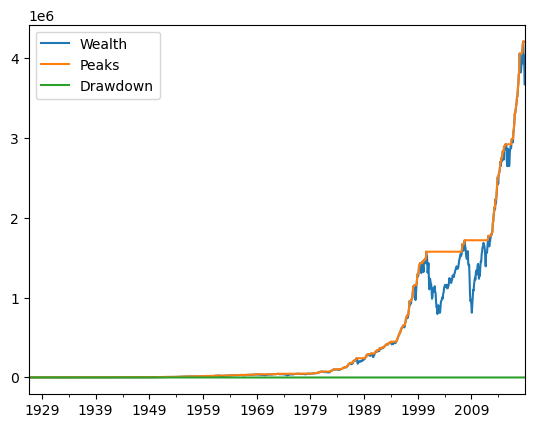

In [56]:
dd.plot()

<Axes: >

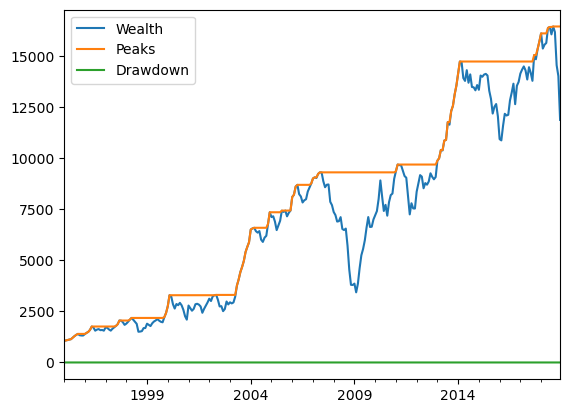

In [65]:
ds = drawdownfunc(rets["1995":]["SmallCap"])
ds.plot()